In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/instagram-reach-analysis-and-forecasting/Instagram-Reach.csv


# Import The Libraries

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import xgboost as xgb

# Load the dataset

In [3]:
instagram_df = pd.read_csv("/kaggle/input/instagram-reach-analysis-and-forecasting/Instagram-Reach.csv")
instagram_df.head()

,Date,Instagram reach
0,2022-04-01T00:00:00,7620
1,2022-04-02T00:00:00,12859
2,2022-04-03T00:00:00,16008
3,2022-04-04T00:00:00,24349
4,2022-04-05T00:00:00,20532


# convert the Date column into datetime datatype to move forward:

In [4]:
instagram_df['Date'] = pd.to_datetime(instagram_df['Date'])
print(instagram_df.head())

        Date  Instagram reach
0 2022-04-01             7620
1 2022-04-02            12859
2 2022-04-03            16008
3 2022-04-04            24349
4 2022-04-05            20532


In [5]:
# Sort data by Date (if not already sorted)
instagram_df = instagram_df.sort_values(by="Date")

In [6]:
# Extract temporal features
instagram_df['Day'] = instagram_df['Date'].dt.day
instagram_df['Month'] = instagram_df['Date'].dt.month
instagram_df['Day_of_Week'] = instagram_df['Date'].dt.dayofweek  # Monday=0, Sunday=6

In [7]:
instagram_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             365 non-null    datetime64[ns]
 1   Instagram reach  365 non-null    int64         
 2   Day              365 non-null    int32         
 3   Month            365 non-null    int32         
 4   Day_of_Week      365 non-null    int32         
dtypes: datetime64[ns](1), int32(3), int64(1)
memory usage: 10.1 KB


# check missing values

In [8]:
# Check for missing values
print("Missing Values Exists")
print(instagram_df.isnull().sum())

# Summary statistics
print(instagram_df.describe())

Missing Values Exists
Date               0
Instagram reach    0
Day                0
Month              0
Day_of_Week        0
dtype: int64
                                Date  Instagram reach         Day       Month  \
count                            365       365.000000  365.000000  365.000000   
mean   2022-09-30 00:00:00.000000256     50474.712329   15.720548    6.526027   
min              2022-04-01 00:00:00      7620.000000    1.000000    1.000000   
25%              2022-07-01 00:00:00     25070.000000    8.000000    4.000000   
50%              2022-09-30 00:00:00     43987.000000   16.000000    7.000000   
75%              2022-12-30 00:00:00     68331.000000   23.000000   10.000000   
max              2023-03-31 00:00:00    161998.000000   31.000000   12.000000   
std                              NaN     30051.787552    8.808321    3.452584   

       Day_of_Week  
count   365.000000  
mean      3.002740  
min       0.000000  
25%       1.000000  
50%       3.000000  
75% 

# missing values finding using value_counts and unique()
- here there is no missing values exist but finding missing values using this functions to find any nun values exists

In [9]:
instagram_df['Date'].value_counts()

Date
2022-04-01    1
2022-12-08    1
2022-12-06    1
2022-12-05    1
2022-12-04    1
             ..
2022-07-30    1
2022-07-29    1
2022-07-28    1
2022-07-27    1
2023-03-31    1
Name: count, Length: 365, dtype: int64

In [10]:
instagram_df['Date'].unique()

<DatetimeArray>
['2022-04-01 00:00:00', '2022-04-02 00:00:00', '2022-04-03 00:00:00',
 '2022-04-04 00:00:00', '2022-04-05 00:00:00', '2022-04-06 00:00:00',
 '2022-04-07 00:00:00', '2022-04-08 00:00:00', '2022-04-09 00:00:00',
 '2022-04-10 00:00:00',
 ...
 '2023-03-22 00:00:00', '2023-03-23 00:00:00', '2023-03-24 00:00:00',
 '2023-03-25 00:00:00', '2023-03-26 00:00:00', '2023-03-27 00:00:00',
 '2023-03-28 00:00:00', '2023-03-29 00:00:00', '2023-03-30 00:00:00',
 '2023-03-31 00:00:00']
Length: 365, dtype: datetime64[ns]

In [11]:
instagram_df['Instagram reach'].value_counts()

Instagram reach
7620     1
39843    1
51028    1
36993    1
37259    1
        ..
55289    1
57778    1
69659    1
62659    1
22014    1
Name: count, Length: 365, dtype: int64

In [12]:
instagram_df['Instagram reach'].unique()

array([  7620,  12859,  16008,  24349,  20532,  19408,  14941,  17263,
        20224,  30471,  39774,  43550,  42342,  55477,  54391,  44108,
        49089,  42790,  49940,  45763,  38457,  45197,  42367,  36076,
        34467,  36772,  35349,  27926,  26184,  26410,  32637,  42204,
        47632,  35793,  35945,  35574,  26940,  27495,  19660,  24138,
        23391,  16748,  17489,  18171,  29682,  33085,  50797,  54392,
        35649,  33654,  46443,  50465,  51263,  55647,  68448,  73815,
        74077,  67922,  80600,  73835,  83221,  77190,  83630,  65133,
        72761,  67778,  54560,  32643,  24889,  27046,  55433,  64168,
        69366,  59358,  46011,  38286,  89665, 133807, 103309, 112461,
       114870, 115782, 110319,  51336,  54666,  62637,  66525,  61001,
        73659,  59505,  60504,  69593,  76763,  63917,  60591,  66350,
        62711,  70608,  61222,  51758,  62099,  69686,  78896,  68331,
        59660,  58746,  59599, 110544, 117070, 122530,  81669,  74793,
      

In [13]:
instagram_df.columns

Index(['Date', 'Instagram reach', 'Day', 'Month', 'Day_of_Week'], dtype='object')

# EDA (Explorative Data Analysis)

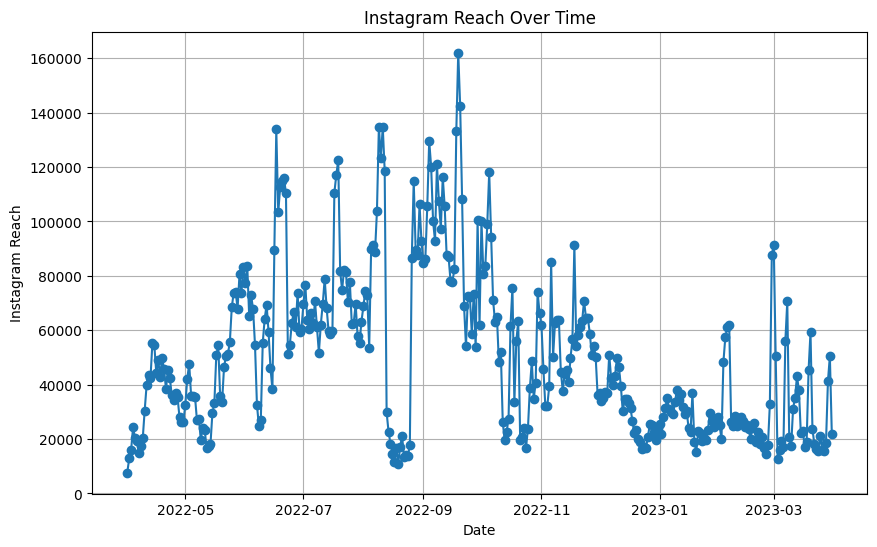

In [14]:
# Plot Reach over time(line plot)
plt.figure(figsize=(10, 6))
plt.plot(instagram_df['Date'], instagram_df['Instagram reach'], marker='o')
plt.title("Instagram Reach Over Time")
plt.xlabel("Date")
plt.ylabel("Instagram Reach")
plt.grid()
plt.show()

# Observation:

1.This code generates a line plot to visualize Instagram reach over time. It begins by setting the size of the plot to 10 inches by 6 inches using plt.figure(figsize=(10, 6)). The plt.plot() function plots the Date from the instagram_df DataFrame on the x-axis and the Instagram reach on the y-axis, with markers ('o') at each data point. The plot is titled "Instagram Reach Over Time," and the x and y axes are labeled as "Date" and "Instagram Reach," respectively. The plt.grid() function adds a grid to the plot for better readability of the values, and plt.show() displays the line plot. This visualizes how the Instagram reach changes across the dates, making it easier to observe trends and patterns over time.


- This code generates a line plot displaying Instagram reach over time, with dates on the x-axis and reach on the y-axis. It uses circular markers for data points, labels the axes, adds a title, and displays a grid for better readability. Finally, plt.show() displays the plot.
-  this code generates a line plot that shows how the Instagram reach changes over time, with each data point marked and axes labeled for clarity.

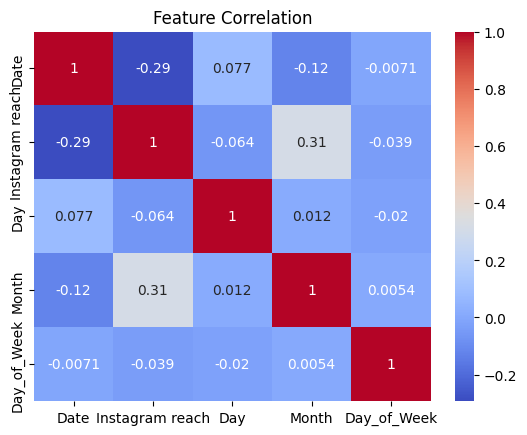

In [15]:
# Correlation heatmap
sns.heatmap(instagram_df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()

# Observation:

- This code generates a correlation heatmap to visualize the relationships between the features in the instagram_df DataFrame. It first calculates the correlation matrix using the .corr() method, which measures the linear relationship between pairs of features. The heatmap is created using Seaborn's sns.heatmap() function, with the annot=True parameter displaying the correlation values inside each cell. The color palette, coolwarm, is used to represent negative correlations with cool colors (blue) and positive correlations with warm colors (red). The plot is titled "Feature Correlation" using plt.title(), and plt.show() is used to display the heatmap. This visualization allows for a quick understanding of how different features are correlated, highlighting strong or weak relationships between them.

In [46]:
import plotly.graph_objs as go
fig = go.Figure()
fig.add_trace(go.Bar(x=instagram_df['Date'], 
                     y=instagram_df['Instagram reach'], 
                     name='Instagram reach'))
fig.update_layout(title='Instagram Reach by Day', 
                  xaxis_title='Date', 
                  yaxis_title='Instagram Reach')
fig.show()

# Observation:
- This code creates an interactive bar chart using Plotly to visualize Instagram reach by day. It starts by importing the necessary module (plotly.graph_objs as go). A figure object is then initialized with go.Figure(). The add_trace() method adds a bar chart to the figure, where the x-axis represents dates from the instagram_df['Date'] column and the y-axis represents the Instagram reach values from the instagram_df['Instagram reach'] column. The trace is labeled as "Instagram reach" for clarity. The update_layout() function customizes the chart's title to "Instagram Reach by Day" and labels the axes as "Date" and "Instagram Reach". Finally, the fig.show() function displays the interactive chart, which allows users to hover over each bar to see the exact reach for each day. The chart provides an engaging and interactive way to explore how Instagram reach changes over time.

# Split Features and Target:

In [17]:
# Features and Target
X = instagram_df[['Day', 'Month', 'Day_of_Week']]
y = instagram_df['Instagram reach']

# Train Test split

In [18]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)

Training Set Shape: (292, 3)
Testing Set Shape: (73, 3)


# - Regression Models

## 1. Random Forest Regressor

In [19]:
from sklearn.metrics import mean_squared_error, r2_score

# initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)

# train the model
rf_model.fit(X_train, y_train)

# Prediction on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Metrics:")
print(f"MSE: {mse_rf:.2f}")
print(f"R-squared: {r2_rf:.2f}")

Random Forest Metrics:
MSE: 330213644.41
R-squared: 0.61


## 2. DecisionTreeRegressor

- A non-linear model that splits the data into regions based on feature thresholds.

In [20]:
from sklearn.tree import DecisionTreeRegressor

# Initialize Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Predict
y_pred_dt = dt_model.predict(X_test)

# Evaluate
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree Regressor Metrics:")
print(f"MSE: {mse_dt:.2f}")
print(f"R-squared: {r2_dt:.2f}")


Decision Tree Regressor Metrics:
MSE: 490068287.84
R-squared: 0.42


## 3. GradientBoostingRegressor

- An ensemble method that combines predictions from weak learners (like decision trees).

In [21]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize Gradient Boosting
gbr_model = GradientBoostingRegressor(random_state=42)

# Train the model
gbr_model.fit(X_train, y_train)

# Predict
y_pred_gbr = gbr_model.predict(X_test)

# Evaluate
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print("Gradient Boosting Regressor Metrics:")
print(f"MSE: {mse_gbr:.2f}")
print(f"R-squared: {r2_gbr:.2f}")

Gradient Boosting Regressor Metrics:
MSE: 465325568.78
R-squared: 0.45


# Compare the models performance

In [22]:
# Combine results into a DataFrame
results = pd.DataFrame({
    'Model': [
        'Random Forest', 'Decision Tree',
        'Gradient Boosting'
    ],
    'MSE': [mse_rf, mse_dt, mse_gbr],
    'R-squared': [r2_rf, r2_dt, r2_gbr]
})

# Display results
print(results)


               Model           MSE  R-squared
0      Random Forest  3.302136e+08   0.611566
1      Decision Tree  4.900683e+08   0.423527
2  Gradient Boosting  4.653256e+08   0.452632


# Visualize the performance

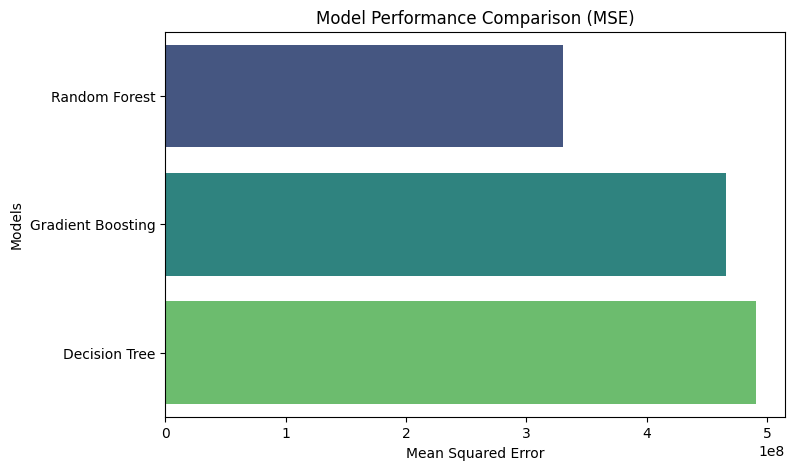

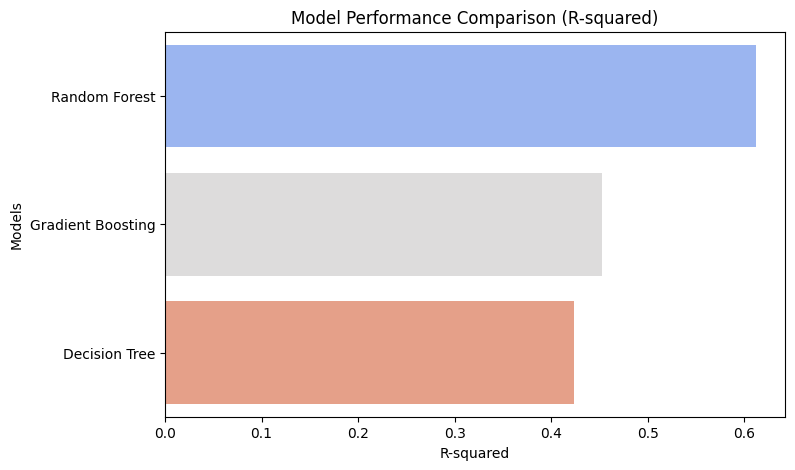

In [23]:
# Filter the results DataFrame for each metric
results_mse = results[['Model', 'MSE']].sort_values(by='MSE', ascending=True)
results_r2 = results[['Model', 'R-squared']].sort_values(by='R-squared', ascending=False)

# Plot MSE comparison
plt.figure(figsize=(8, 5))
sns.barplot(x='MSE', y='Model', data=results_mse, palette='viridis')
plt.title('Model Performance Comparison (MSE)')
plt.xlabel('Mean Squared Error')
plt.ylabel('Models')
plt.show()

# Plot R-squared comparison
plt.figure(figsize=(8, 5))
sns.barplot(x='R-squared', y='Model', data=results_r2, palette='coolwarm')
plt.title('Model Performance Comparison (R-squared)')
plt.xlabel('R-squared')
plt.ylabel('Models')
plt.show()

In [24]:
# Sort by R-squared to identify the best regression model
print(results_r2.sort_values(by='R-squared', ascending=False))

# Sort by MSE to identify the best regression model
print(results_mse.sort_values(by='MSE', ascending=True))

               Model  R-squared
0      Random Forest   0.611566
2  Gradient Boosting   0.452632
1      Decision Tree   0.423527
               Model           MSE
0      Random Forest  3.302136e+08
2  Gradient Boosting  4.653256e+08
1      Decision Tree  4.900683e+08


# Based on the evaluation metrics provided (R-squared and MSE), the best model is the one with:
1. Highest R-squared value (closer to 1 is better).
2. Lowest Mean Squared Error (MSE) (lower is better). Here’s the ranking of the models based on the metrics:

# Based on both R-squared and MSE, Random Forest is the best model among the three. It has the highest R², indicating a good fit, and the lowest MSE, indicating the least error in predictions.

# - Classification Models

In [25]:
# Define bins for Instagram Reach
bins = [0, 5000, 15000, 30000, np.inf]
labels = ['Low', 'Medium', 'High', 'Very High']
instagram_df['Reach_Category'] = pd.cut(instagram_df['Instagram reach'], bins=bins, labels=labels)

# Check the new categories
print(instagram_df['Reach_Category'].value_counts())

Reach_Category
Very High    244
High         110
Medium        11
Low            0
Name: count, dtype: int64


In [45]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
instagram_df['Reach_Category'] = le.fit_transform(instagram_df['Reach_Category'])

# Feature and Target

In [27]:
# Features and Target for Classification
X_class = instagram_df[['Day', 'Month', 'Day_of_Week']]
y_class = instagram_df['Reach_Category']

# Train Test split

In [28]:
# Train-test split
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

print("Training Set Shape:", X_train_class.shape)
print("Testing Set Shape:", X_test_class.shape)

Training Set Shape: (292, 3)
Testing Set Shape: (73, 3)


## 1. Random Forest classifier

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize the Random Forest Classifier
rf_class_model = RandomForestClassifier(random_state=42, n_estimators=100)

# Train the model
rf_class_model.fit(X_train_class, y_train_class)

# Prediction on the test set
y_pred_rf_class = rf_class_model.predict(X_test_class)

# Evaluate the model
rf_class_accuracy = accuracy_score(y_test_class, y_pred_rf_class)
rf_class_precision = precision_score(y_test_class, y_pred_rf_class, average='weighted')
rf_class_recall = recall_score(y_test_class, y_pred_rf_class, average='weighted')
rf_class_f1 = f1_score(y_test_class, y_pred_rf_class, average='weighted')

# Print evaluation metrics
print("Random Forest Classifier Metrics:")
print(f"Accuracy: {rf_class_accuracy:.2f}")
print(f"Precision: {rf_class_precision:.2f}")
print(f"Recall: {rf_class_recall:.2f}")
print(f"F1 Score: {rf_class_f1:.2f}")

Random Forest Classifier Metrics:
Accuracy: 0.71
Precision: 0.71
Recall: 0.71
F1 Score: 0.71


## 2. Decision Tree Classifier

In [37]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree Classifier
dt_class_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_class_model.fit(X_train_class, y_train_class)

# Predict on test set
y_pred_dt_class = dt_class_model.predict(X_test_class)

# Evaluate the model
dt_class_accuracy = accuracy_score(y_test_class, y_pred_dt_class)
dt_class_precision = precision_score(y_test_class, y_pred_dt_class, average='weighted')
dt_class_recall = recall_score(y_test_class, y_pred_dt_class, average='weighted')
dt_class_f1 = f1_score(y_test_class, y_pred_dt_class, average='weighted')

# Print evaluation metrics
print("Decision Tree Classifier Metrics:")
print(f"Accuracy: {dt_class_accuracy:.2f}")
print(f"Precision: {dt_class_precision:.2f}")
print(f"Recall: {dt_class_recall:.2f}")
print(f"F1 Score: {dt_class_f1:.2f}")

Decision Tree Classifier Metrics:
Accuracy: 0.77
Precision: 0.80
Recall: 0.77
F1 Score: 0.78


## 3. Gradient Boosting Classifier

In [42]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting Classifier
gbr_class_model = GradientBoostingClassifier(random_state=42)

# Train the model
gbr_class_model.fit(X_train_class, y_train_class)

# Predict on test set
y_pred_gbr_class = gbr_class_model.predict(X_test_class)

# Evaluate the model
gbr_class_accuracy = accuracy_score(y_test_class, y_pred_gbr_class)
gbr_class_precision = precision_score(y_test_class, y_pred_gbr_class, average='weighted')
gbr_class_recall = recall_score(y_test_class, y_pred_gbr_class, average='weighted')
gbr_class_f1 = f1_score(y_test_class, y_pred_gbr_class, average='weighted')

# Print evaluation metrics
print("Gradient Boosting Classifier Metrics:")
print(f"Accuracy: {gbr_class_accuracy:.2f}")
print(f"Precision: {gbr_class_precision:.2f}")
print(f"Recall: {gbr_class_recall:.2f}")
print(f"F1 Score: {gbr_class_f1:.2f}")

Gradient Boosting Classifier Metrics:
Accuracy: 0.74
Precision: 0.73
Recall: 0.74
F1 Score: 0.73


# Compare the models performance

In [43]:
# Combine classification results into a DataFrame
class_results = pd.DataFrame({
    'Model': ['Random Forest', 'Decision Tree', 'Gradient Boosting'],
    'Accuracy': [rf_class_accuracy, dt_class_accuracy, gbr_class_accuracy],
    'Precision': [rf_class_precision, dt_class_precision, gbr_class_precision],
    'Recall': [rf_class_recall, dt_class_recall, gbr_class_recall],
    'F1 Score': [rf_class_f1, dt_class_f1, gbr_class_f1]
})

# Display results
print(class_results)

               Model  Accuracy  Precision    Recall  F1 Score
0      Random Forest  0.712329   0.709484  0.712329  0.707795
1      Decision Tree  0.767123   0.799924  0.767123  0.782089
2  Gradient Boosting  0.739726   0.733638  0.739726  0.731431


# Visualize the models performance

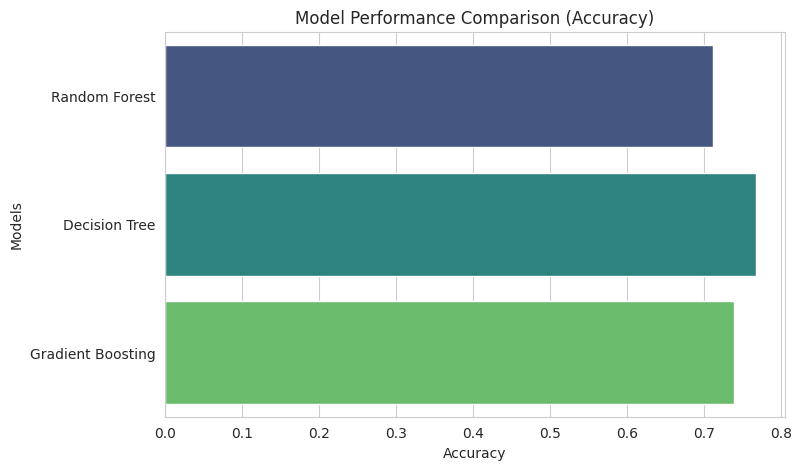

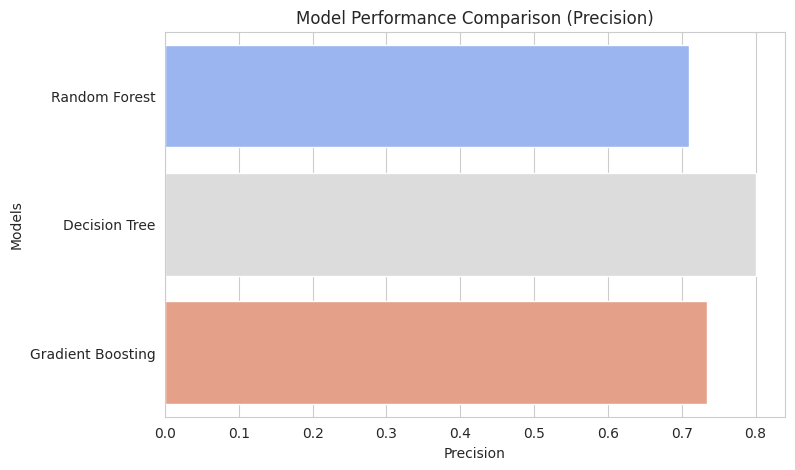

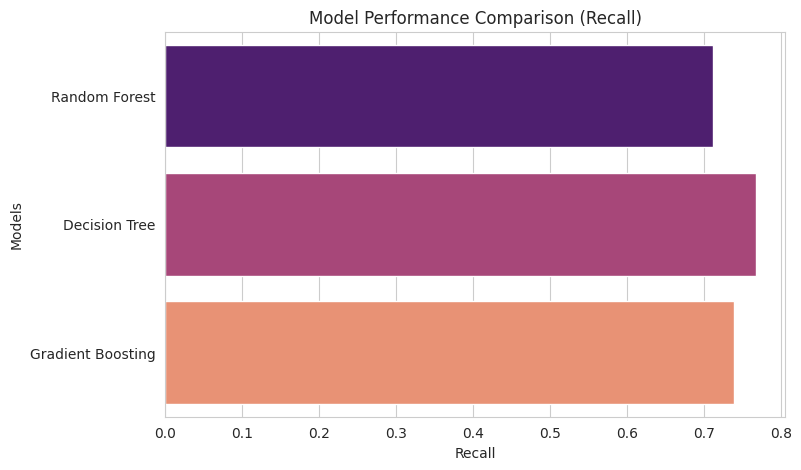

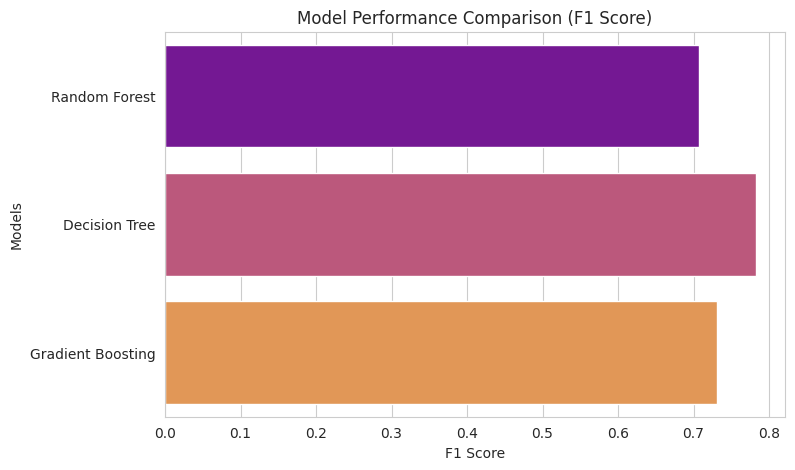

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Plot Accuracy Comparison
plt.figure(figsize=(8, 5))
sns.barplot(x='Accuracy', y='Model', data=class_results, palette='viridis')
plt.title('Model Performance Comparison (Accuracy)')
plt.xlabel('Accuracy')
plt.ylabel('Models')
plt.show()

# Plot Precision Comparison
plt.figure(figsize=(8, 5))
sns.barplot(x='Precision', y='Model', data=class_results, palette='coolwarm')
plt.title('Model Performance Comparison (Precision)')
plt.xlabel('Precision')
plt.ylabel('Models')
plt.show()

# Plot Recall Comparison
plt.figure(figsize=(8, 5))
sns.barplot(x='Recall', y='Model', data=class_results, palette='magma')
plt.title('Model Performance Comparison (Recall)')
plt.xlabel('Recall')
plt.ylabel('Models')
plt.show()

# Plot F1 Score Comparison
plt.figure(figsize=(8, 5))
sns.barplot(x='F1 Score', y='Model', data=class_results, palette='plasma')
plt.title('Model Performance Comparison (F1 Score)')
plt.xlabel('F1 Score')
plt.ylabel('Models')
plt.show()

# Best Model Selection Criteria:
- Accuracy: Measures overall correctness. Decision Tree (0.7671) has the highest accuracy.
  
- Precision: Measures correctness of positive predictions. Decision Tree (0.7999) is the highest.

  
- Recall: Measures completeness (how many actual positive cases were identified). Gradient Boosting (0.7397) and Decision Tree (0.7671) are close.

  
- F1 Score: Harmonic mean of Precision and Recall, balancing both metrics. Decision Tree (0.7821) is the highest.

The Decision Tree Classifier is the best model in this case, as it has:  The highest Accuracy (0.7671)
1.  The highest Precision (0.7999)
2.  The highest F1 Score (0.7821)

 second Gradient boosting

# Conclusion:

In this study, we analyzed Instagram reach data and developed predictive models for both regression and classification tasks. For regression, Random Forest Regressor provided the best results with the highest R-squared value and the lowest Mean Squared Error (MSE), making it the most effective model for predicting future Instagram reach.

For classification, the Decision Tree Classifier emerged as the best-performing model with the highest accuracy (76.71%), precision (79.99%), and F1 score (78.21%), indicating its superior ability to categorize Instagram reach into different levels.

Our findings suggest that Decision Tree Classifier is the most reliable for classifying Instagram reach levels, while Random Forest Regressor is the best for forecasting future engagement. These models can help social media analysts optimize content strategies and improve reach by leveraging predictive analytics. 